# Subtractive clustering Method - SCM (Mountain clustering method)


In 1994, Jager and Filev introduced the so-called `mountain` function as a measure of spatial density around the vertices of the grid to determine the approximate locations of cluster centers in a data set with clustering trends[^3].

The hardware spectrum of gamma radiation is not a continuous function, but a two-dimensional histogram or distribution of intensity gradients from a set of N points $(x_n,y_n)$ in the $R×R$ space. The first step in the `mountain` method is to form a discretization of the $X×Y$ space by binding $X$ and $Y$ to $r_1$ and $r_2$, respectively, equidistant lines or radii. The intersection of these grid radii, called nodes, forms a set of potential cluster centers $C$, whose element is denoted as $C_{ij} (X_i,Y_j)$.

The second step is to build the function `mountain`, $P$, which is defined on the set $C$ of potential cluster centers, which increases the number of calculations required.
$$ P:C \rightarrow R $$
The function $P$ is constructed from the observed events by adding a sum to each node in $C$ proportional to the distance of these nodes from the data point. More formally, for each point $C_{ij} (X_i,Y_j)$:

\begin{equation}
\tag{1}
P_n(C_{ij}) = \sum_{n=1}^q e^{-\alpha d(C_{ij}, O_n)}
\end{equation}

where: $\alpha$ – a positive constant equal to $4/r_1^2$ , $O_n$ – $n$-th data point $(x_n,y_n)$ и $d(C_ij,O_n)$ - a measure of the distance between $С_ij$ и $O_n$, in here, the Euclidean distance is used.

The third step in the `mountain` method is to use the function to create cluster centers.

Let the node $C_1^*$ be the grid point with the maximum total score, the vertex of the function. Then its estimate is $P_1^*=max_{ij} [P(C_ij)]$. If there is more than one maximum, one of them is randomly selected. The node is designated as the first cluster center with coordinates $C_1^*=(x_1^*,y_1^*)$. Next, to get the next cluster center, it is necessary to form a revised function $\hat{P_2}$, also defined in $C$ such that:

\begin{equation}
\tag{2}
\hat{P_2}(C_{ij}) = P_1(C_{ij}) - P_1^* e^{-\beta d(C_{1}^*, C_{ij})}
\end{equation}

where $P_1$ is the original function of the mountain, $P$, $β$ is a positive constant equal to $4/r_2^2$, $C_1^*$ and $P_1^*$ are the location and estimate in the newly identified cluster center, and $d(N_1^*,N_ij)$ is a measure of distance.

More generally, starting with the revised mountain function $\hat{P_n}$, which is the result of finding the th cluster center:

- Find $P_n^*=max_{ij} [\hat{P_n}(C_ij)]$
- Determine the $n$-th cluster center in $C_n^*$, the location of the maximum node found in $i$.
- Form a revised function $\hat{P}_{(n+1)}$ as:

\begin{equation}
\tag{3}
\hat{P}_{n+1}(C_{ij}) = \hat{P}_n(C_{ij}) - P_n^* e^{-\beta d(C_{n}^*, C_{ij})}
\end{equation}

The process of destruction of the `mountain` function ends $p$ at the $p$-cluster centers step after the next $\hat{P}_{(n+1)}$ becomes less than the specified completion constant $\epsilon$:

\begin{equation}
\tag{4}
P_{p+1}^* < \varepsilon
\end{equation}

[^3]: R. R. Yager and D. Filev. "Learning of Fuzzy Rules by Mountain-Clustering". Proc. IEEE Internat. Conf. on Fuzzy Systems, pp. 1240–1245, 1994.

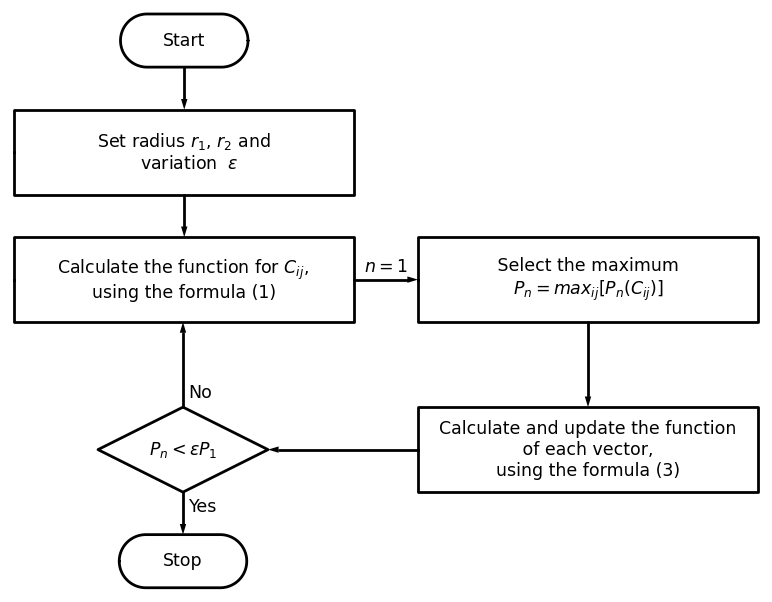

In [2]:
import schemdraw
from schemdraw import flow

def FCSC():
    with schemdraw.Drawing() as d:
        d += schemdraw.flow.Start().label('Start')
        d += schemdraw.flow.Arrow().down(d.unit/3)
        d += schemdraw.flow.Box(w=8).label('Set radius $r_1$, $r_2$ and \n  variation  $\epsilon$')
        d += schemdraw.flow.Arrow().down(d.unit/3)
        d += (q1 := schemdraw.flow.Box(w=8).label('Calculate the function for $C_{ij}$, \nusing the formula (1)'))
        d += schemdraw.flow.Arrow().right(d.unit/2).at(q1.E).label('$n=1$')
        d += (q2 := schemdraw.flow.Box(w=8).label(' Select the maximum \n$P_n = max_{ij}[P_n(C_{ij})]$'))
        d += schemdraw.flow.Arrow().down(d.unit/1.5).at(q2.S)
        d += (q3 := schemdraw.flow.Box(w=8).label('Calculate and update the function\n of each vector, \nusing the formula (3)'))
        d += schemdraw.flow.Arrow().left(d.unit/0.85).at(q3.W)
        d += (q4 := schemdraw.flow.Decision(S = 'Yes', N = 'No').label('$P_n < \epsilon P_1$'))
        d += schemdraw.flow.Arrow().up().at(q4.N).to(q1.S)
        d += schemdraw.flow.Arrow().down(d.unit/3).at(q4.S)
        d += (q5 := schemdraw.flow.Start().label('Stop'))
FCSC()